In [34]:
#a lesson in toy problems and design thinking concepts...

import datetime
import importlib
import pickle
import scipy.stats
import scipy.stats as stats
import math
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np  

#For simplest hypothesis test we can do ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chisquare
from IPython.display import Image as imgx
from pd_funcs import clean_funcs
from pd_funcs import demo_funcs
from astropy.time import Time
from scipy.stats import chi2_contingency

importlib.reload(demo_funcs)
importlib.reload(clean_funcs)

<module 'pd_funcs.clean_funcs' from 'D:\\SIM_Teach\\Github_SIMTEACH_REPO_2\\SIMTEACHREPO\\pd_funcs\\clean_funcs.py'>

In [35]:
df = pd.read_csv('./load_data/Loan_Data.csv')

df = clean_funcs.clean_df(df)

In [36]:
data_bag  =['mango', 'orange','apple','orange',
            'strawberry','strawberry','cucumber', 'mango',
            'lemon','orange','guava', 'mango', 'strawberry',
            'strawberry','blackberry','strawberry','apple',
            'lemon','orange','guava','strawberry',
            'apple','guava', 'lemon','orange',
            'orange','cucumber','cucumber','lemon',
            'cucumber','lemon']

print(len(data_bag),"items in the bag")

31 items in the bag


In [22]:
#A confidence interval (CI) is a range of values for which there is an attached probability that the value of a 
#measured parameter lies within it.

#Computed with the confidence level (CL). Confidence levels is a probability (0.8, 0.9, 0.95, 0.95) with which the 
#estimation of the location of a measured parameter (e.g. mean) in a sample is also true for the population. 
#The CL is adjustable based on our confidence but 0.95 is usually the best practice.

#The higher the CL, the bigger the CI. The lower the CL, the smaller the CI. The difference between the CI bounds and the
#mean is the margin of error.

In [4]:
# Example of making a point estimae for the variable 'strawberry'
# Specify sample occurrences (x), sample size (n) and confidence level
x = data_bag.count('strawberry')
n = len(data_bag )
cl = 0.9 #This is set by best practice

#Calculate 
pes = x/n #point estimate
a = (1-cl) #alpha - level of significance
critical_z = stats.norm.ppf(1-a/2) #critical z-value
standard_error = math.sqrt((pes*(1-pes)/n)) #standard error, 
margin_of_error = critical_z * standard_error #margin of error

# Calculate the lower and upper bound of the confidence interval
lower_bound = pes - margin_of_error
upper_bound = pes + margin_of_error

# Print the results
print("The confidence interval of observing observing strawberry from the population is between", 
      np.round(lower_bound, 4),"and",np.round(upper_bound, 4),
     "given a condfidence level of:", cl)

The confidence interval of observing observing strawberry from the population is between 0.0768 and 0.3103 given a condfidence level of: 0.9


In [5]:
#Confidence intervals can be used to estimate population means.

demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.96, verbose=True)

The confidence interval of observing observing strawberry from the distribution is 0.04781789384399812 and 0.3392788803495502 given a condfidence level of: 0.96


0.2914609865055521

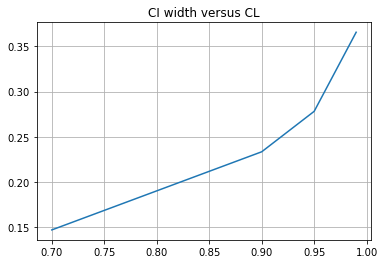

In [6]:
#As CL increases, CI increases.
plt.plot([0.7, 0.9, 0.95, 0.99], 
         [ demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.7),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.9),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.95),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry',  0.99)])
plt.title("CI width versus CL")
plt.grid()

#The greater your confidence level. The wider your confidence interval. The greater your confidence
#level the larger the net you have to catch the mean correct mean value

In [7]:
#We can also compute for a numerical data for a moderately large sample size
demo_funcs.confidence_level_numerical(df['LoanAmount'], 0.95, verbose=True)

#We are 95% sure that the mean will fall within these brackets.
#If you want to be 99% sure... widen your bracket

The confidence interval of the population mean 146.4122  is 139.7573 and 153.0671 given a condfidence level of: 0.95


In [8]:
demo_funcs.confidence_level_numerical(df['HouseIncome'], 0.95, verbose=True)

The confidence interval of the population mean 7024.7051  is 6513.2459 and 7536.1643 given a condfidence level of: 0.95


In [9]:
demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.96, verbose=True)

The confidence interval of observing observing strawberry from the distribution is 0.04781789384399812 and 0.3392788803495502 given a condfidence level of: 0.96


0.2914609865055521

In [164]:
#Hypothesis testing allows us to test an assumption regarding a population parameter
#Check if a hypothesis is True or False.

#Suppose we have 2 groups:
#They could be:
    #Test scores of two separate classes in a school
    #Weights of two samples of birds living on an island (perhaps geographically separated)
    #Income of two different samples of populations of people  
    
group_a = [70, 80, 65, 32, 89, 72, 32, 54, 34, 56, 68, 62, 80, 75, 63, 45,
             54, 58, 50, 61, 72, 73, 41, 82, 90, 42, 54, 62, 85, 81, 70, 70,
             45, 18, 80, 21, 11, 83, 77, 62, 26, 54, 64, 81, 71, 32, 63, 61,
             51, 86, 18, 18, 12, 92, 94, 17, 67, 18, 71, 32, 75, 52, 20, 83,
             51, 41, 27, 88, 64, 36, 82, 29, 62, 48, 21, 96, 81, 49, 31, 99]

group_b = [91, 68, 69, 40, 80, 29, 50, 74, 69, 52, 57, 45, 50, 88, 59, 82, 
             90, 85, 40, 60, 72, 37, 87, 58, 63, 56, 85, 84, 71, 64, 80, 61,
             82, 58, 96, 61, 62, 73, 66, 82, 60, 40, 92, 82, 55, 91, 79, 79,
             85, 38, 19, 40, 84, 83, 51, 62, 79, 42, 64, 80, 35, 67, 88, 99,
             67, 86, 78, 68, 79, 92, 94, 87, 64, 51, 81, 78, 75, 52, 60, 83]

In [24]:
#p value-> The probability of observing the data or data more extreme given that the null is true
#A small p-value (typically less than the significance 0.05) indicates that the observed data is unlikely to
#have occurred by random chance, and suggests that the null hypothesis should be rejected in favor 
#of the alternative hypothesis.

#Alpha -> The significance level, is the threshold of probability (p-value) 
#at which you reject the null hypothesis in a hypothesis test. It is typically set at 0.05.
#You can also define the rejection region defined by z values.

#One tail test
#cl = 0.95
#a = 1-0.95 = 0.05

#Two tail test
#a = a/2 = 0.05/2
#On both sides of the distribution if we are looking at both ends of the distributions

#IF THE PVALUE IS LESS THAN ALPHA/ WITHIN THE REJECTION REGION WE REJECT THE NULL HYPOTHESIS

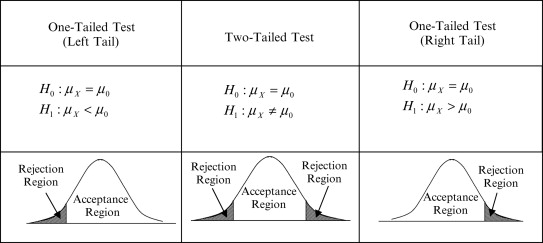

In [38]:
#This can be visualized as if the p value falls in the rejection region

#For Example
imgx(filename='./imgs/hypTest2.jpg') 

In [39]:
print("The number of students in group A is:", len(group_a))
print("The number of students in group B is:", len(group_b))


The number of students in group A is: 80
The number of students in group B is: 80


In [40]:
#Lets say in the year 2019 someone did a study and found that the mean score is 60
#Then comes a researcher and measures and acquires the sample group_a

#We can state our Null hypothesis in this case that the mean score is 60
#Null hypothesis are hypothesis of NO CHANGE. NO DIFFERENCE. (status quo)
#Alternate hypothesis the mean score is not 60, challenge the status quo

#H_o = The mean score = 60
#H_1 = The mean score != 60

#We can test for significance of a single sample using ztest
#https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html
#returns a test statistic and a p value

ztest_reultst = ztest(group_a, value=60)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

#We fail to reject the null.

Zscore: -1.0367724034725139 pValue 0.29984193960498506


In [41]:
#Another sample is acquired and is tested agains the same null hypothesis
ztest_reultst = ztest(group_b, value=60)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

#We Reject the null. The mean is np.mean(group_b)

Zscore: 4.17152619442383 pValue 3.0256626688326636e-05


In [165]:
#This is interesting. Based on the results of the ztest 
#We can also compare two samples 

#H_o = The mean score class_a = class_b 
    #They are cut from the same cloth. The two populations are identical
#H_1 = The mean score class_a != class_b
    #They are two distinct different populations

ztest_reults = ztest(group_a, group_b,value=0)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

#A Z-stat is just a distance from the mean. 
#The closer your Z-score is to zero, the closer your value is to the mean.

#We can use t test if the variance is unknown and the sample size is small

Zscore: 4.17152619442383 pValue 3.0256626688326636e-05


Correlation Coefficient: 0.6544125917346852 Pvalue: 0.02890829080248868


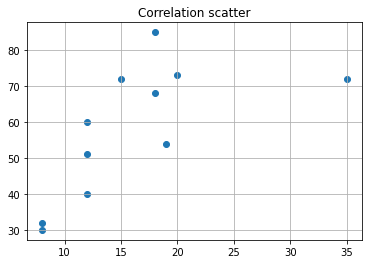

In [180]:
#Correlation test. Pearsons correlation coeeficient
#1 is positive strong correlation
#0 is no correlation
#-1 is negative anti correlation

#H_0 = there is no correlation between the two variables
#H_1 = there is a correlation between two variables

#Is practice a good predictor of actual? 

practice = [15, 18, 12, 19, 18, 12, 12, 8, 8, 20, 35]
actual = [72, 68, 60, 54, 85, 51, 40, 32, 30, 73, 72 ]

corr = stats.pearsonr(practice, actual)
print ("Correlation Coefficient:", corr[0], "Pvalue:", corr[1]) 

#Reject the 
plt.scatter(practice, actual )
plt.grid()
plt.title("Correlation scatter")
plt.show()

Correlation Coefficient: 0.0020030347299763995 Pvalue: 0.9956183791079166


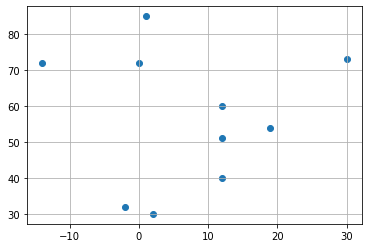

In [47]:
practice = [-14, 0, 12, 19, 1, 12, 12, -2, 2, 30]
actual = [72, 72, 60, 54, 85, 51, 40, 32, 30, 73 ]

corr = stats.pearsonr(practice, actual)
print ("Correlation Coefficient:", corr[0], "Pvalue:", corr[1]) 

#Reject the 
plt.scatter(practice, actual )
plt.grid()
plt.show()

In [58]:
#Chi squared test
#Pearson's chi-squared test applied to categorical data to evaluate how likely 
#any observed difference between the data arose by chance.
    #Independence
        #H_0 = There is no association/ there is no good of fit between the two variables
        #H_1 = There is a association/ good fit between the two variables
    #Goodness of fit test for two categorical variables
        #Does it fit a certain distribution? i.e. normal or not.
        #H_0 = Fits the distribution
        #H_1 = Does not fit

#Contingency table- Frequency distribution of the categorical classes
        #Apple, Orange
#Char1     3      5
#Char2     1      2
#Char3     6      7

table = [[10, 20, 30, 40, 50],
         [6,  9,  17, 18, 39]]
stat, p, dof, expected = chi2_contingency(table)

print('stat=%.3f, p=%.3f, dof=%.3f' % (stat, p, dof))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=3.106, p=0.540, dof=4.000
Probably independent


In [100]:
#How to make a cross tab

#Remember you Binarized this/ Replace Categorical with Numerical
#data_F['Married'].replace(['Yes', 'No'],
#                        [0, 1], inplace=True)
#data_F['Gender'].replace(['Male', 'Female'],
#       	                [0, 1], inplace=True)
#data_F['Education'].replace(['Graduate', 'Not Graduate'],
#       	                [0, 1], inplace=True)
#data_F['Self_Employed'].replace(['Yes', 'No'],
#       	                [1, 0], inplace=True)

xtabdepeded = pd.crosstab(df["Dependents"], [df["Education"]] ,rownames=["Dependents"], colnames=["Education"]  )
xtabdepeded

Education,0,1
Dependents,,
0.0,286,74
1.0,81,21
2.0,77,24
3.0,36,15


In [101]:
xtabdepmarr = pd.crosstab(df["Dependents"], [df["Married"]] ,rownames=["Dependents"], colnames=["Married"]  )
xtabdepmarr

Married,0,1
Dependents,,
0.0,185,175
1.0,79,23
2.0,93,8
3.0,44,7


In [102]:
xtabMarrEd = pd.crosstab(df["Married"], [df["Dependents"], df["Education"]] ,rownames=["Married"], colnames=["Dependents", "Education"])
xtabMarrEd 

Dependents  0.0     1.0     2.0     3.0    
Education     0   1   0   1   0   1   0   1
Married                                    
0           147  38  65  14  69  24  31  13
1           139  36  16   7   8   0   5   2

In [103]:
#H_0 = There is no association/ there is no good of fit between Dependents and Marital Status (unrelated)
#H_1 = There is a association/ good fit between Dependents and Marital Status

stat, p, dof, expected = chi2_contingency([xtabdepeded[0], xtabdepeded[1]])

print('stat=%.3f, p=%.3f, dof=%.3f' % (stat, p, dof))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=2.374, p=0.498, dof=3.000
Probably independent


In [104]:
#H_0 = There is no association/ there is no good of fit between Education and Dependents (unrelated)
#H_1 = There is a association/ good fit between Education and Dependents

stat, p, dof, expected = chi2_contingency([xtabdepmarr [0], xtabdepmarr [1]])

print('stat=%.3f, p=%.3f, dof=%.3f' % (stat, p, dof))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=79.269, p=0.000, dof=3.000
Probably dependent


Statistic: 5.0127344877344875 pvalue: 0.542180861413329


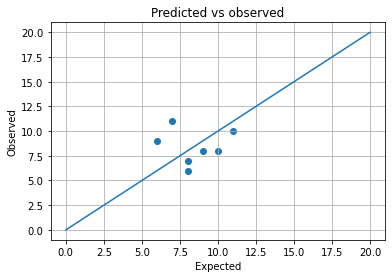

In [145]:
#Chi squared goodness of fit.
#H_0 = There is no difference between the observed and the expected
#H_1 = There is a difference between the observed and the expected
expected = [9, 8, 11, 8, 10, 7, 6]
observed = [8, 6, 10, 7, 8, 11, 9]

#chisquare(observed, f_exp=expected )
#What do the DOF influence

chi_square_stats = chisquare(f_obs=observed, f_exp=expected)

print("Statistic:", chi_square_stats[0], "pvalue:", chi_square_stats[1])

#A good way of visualizing goodness of fit is plotting predicted vs observed. Is it tight?
plt.scatter(expected,observed)
plt.plot([0,20], [0,20])
plt.title("Predicted vs observed")
plt.xlabel("Expected")
plt.ylabel("Observed")
plt.grid()
plt.show()

In [147]:
df = pd.read_csv('./data/best_selling_switch_games.csv')

dfori = df.copy()
dfori

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15
...,...,...,...,...,...,...,...
68,Fitness Boxing,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2020-09-08,2018-12-20
69,Fitness Boxing 2: Rhythm and Exercise,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2021-12-09,2020-12-04
70,Shin Megami Tensei V,1000000.0,Role-playing,Atlus,JP: AtlusNA: SegaPAL: Nintendo,2022-04-18,2021-11-11
71,Story of Seasons: Pioneers of Olive Town,1000000.0,Simulationrole-playing,Marvelous,Xseed Games,2021-11-18,2021-02-25


In [ ]:
#Lets think of some tests to do with this data and how to structure the data to carry those tests out.

In [156]:
#Game Developers impact N copies sold.

print("Do some developers sell more copies than others?")
print("H_o: There is no difference between game developer A and game developer B in terms of N copies sold")
print("H_1: There is a difference between game developer A and game developer B in terms of N copies sold")
print("You can also make a correlation matrix to visualize this.")

#For each developer
    #Make an array containing data of N copies sold

#You could also test Nintendo developed titles vs non Nintendo developed titles

#Make two arrays. One with Nintendo developed titles () N copies sold and one with non Nintendo developed titles N copies sold 
    
#ztest_reults = ztest(developer_a, developer_b,value=0)
#print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Do some developers sell more copies than others?
H_o: There is no difference between game developer A and game developer B in terms of N copies sold
H_1: There is a difference between game developer A and game developer B in terms of N copies sold
You can also make a correlation matrix for this.


In [194]:
#Release date

print("It is often thought that more games are purchased at the holiday season versus off season")

print("H_o: There is no correlation between release date(month) and number of copies sold")
print("H_1: There is a correlation between release date and number of copies sold\n")

print("It would be interesting to test release date of previous year data versus current years data.")
print("Is last years data a good predictor of this years data?")

print("H_o: There is no correlation between sales of last year and sales of this year")
print("H_1: There is a correlation between sales of last year and sales of this year\n")

#How would we test that?
    #Convert release date into 12 bins. One for each month
    
    #Sum N copies sold in each bin.
    
    #Make a linspace of indexes for each month starting from jan to december (1 to 12)
    
    #It would be interesting to to test release date of previous year data versus current years data.
    #Is the current years data a good predictor of this years data?
    #Same thing but your inputs would be lists of sum(N copies sold) of len = 12
    
    #Use pearson correlation test: corr = stats.pearsonr(month, N copies sold)
    #Use pearson correlation test: corr = stats.pearsonr(last_year_N_copies, This_year_N_copies)

It is often thought that more games are purchased at the holiday season versus off season
H_o: There is no correlation between release date(month) and number of copies sold
H_1: There is a correlation between release date and number of copies sold

It would be interesting to test release date of previous year data versus current years data.
Is last years data a good predictor of this years data?


In [203]:
print("Roleplaying and action roleplaying sell the at the rate same. Do they?")
print("H_o: There is no difference between the N copies sold of roleplaying and N copies sold of action roleplaying")
print("H_1: There is a difference between the N copies sold of roleplaying and N copies sold of action roleplaying\n")
    
#ztest_reults = ztest(N_copies_RPG, N_copies_ARPG)
#Interpret result

#It would be interesting to bring in the developer as well. Test associations of some developers versus the genre of games
#they release.

print("H_o: There is no difference between the distribution of genres released by developer A vs developer B")
print("H_1: There is a difference between the distribution of genres released by developer A vs developer B\n")

#How would we test this?

Roleplaying and action roleplaying sell the at the rate same. Do they?
H_o: There is no difference between the N copies sold of roleplaying and N copies sold of action roleplaying
H_1: There is a difference between the N copies sold of roleplaying and N copies sold of action roleplaying

H_o: There is no difference between the distribution of genres released by developer A vs developer B
H_1: There is a difference between the distribution of genres released by developer A vs developer B

